In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

from datetime import date

In [21]:
file_path = 'data/vietnam_macro_economic_by_month.csv'
data = pd.read_csv(file_path)
data.head()

,Thời gian,FDI,FDI đăng kí (lũy kế năm),FDI giải ngân (lũy kế năm),Thương mại (lũy kế năm),Xuất khẩu (lũy kế năm),Nhập khẩu (lũy kế năm),Cung tiền & tín dụng,Tăng trưởng tín dụng,Nông nghiệp,...,Chi thường xuyên,Chỉ số giá,Lạm phát cơ bản,Lạm phát,Thực phẩm,Nhà ở và VLXD,Y tế,Vận tải,Chỉ số PMI,Tăng trưởng GDP thực tế
0,-,-,% YoY,% YoY,-,% YoY,% YoY,-,% YoY,% YoY,...,% YoY,-,% YoY,% YoY,% YoY,% YoY,% YoY,% YoY,-,% YoY
1,T1 2017,-,19,6.3,-,6,3.2,-,19.5,17.7,...,NaN,-,1.9,5.2,2.4,3.5,79.4,5,51.9,5.2
2,T2 2017,-,21.5,3.3,-,16.5,23.5,-,19.6,17.5,...,NaN,-,1.5,5,-0.3,4.8,79.8,10,54.2,5.2
3,T3 2017,-,91.5,3.4,-,15.7,25.4,-,21.6,17.9,...,NaN,-,1.6,4.7,-0.9,5.3,48.7,14.6,54.6,5.2
4,T4 2017,-,53.9,3.2,-,17.4,24.8,-,20.6,17.8,...,NaN,-,1.5,4.3,-1.7,4.3,63.6,11.1,54.1,6.4


In [22]:
data.columns

Index(['Thời gian', 'FDI', 'FDI đăng kí (lũy kế năm)',
       'FDI giải ngân (lũy kế năm)', 'Thương mại (lũy kế năm)',
       'Xuất khẩu  (lũy kế năm)', 'Nhập khẩu  (lũy kế năm)',
       'Cung tiền & tín dụng', 'Tăng trưởng tín dụng', 'Nông nghiệp',
       'Thương mại', 'Công nghiệp', 'Xây dựng', 'Cung tiền M2', 'Tài khóa',
       'Tổng thu', 'Nội địa', 'Tổng chi', 'Chi đầu tư phát triển',
       'Chi thường xuyên', 'Chỉ số giá', 'Lạm phát cơ bản', 'Lạm phát',
       'Thực phẩm', 'Nhà ở và VLXD', 'Y tế', 'Vận tải', 'Chỉ số PMI',
       'Tăng trưởng GDP thực tế'],
      dtype='object')

In [23]:
columns = ['Thoi_gian', 'FDI', 'FDI_dang_ki',
       'FDI_giai_ngan', 'Thuong_mai_luy_ke_nam',
       'Xuat_khau_luy_ke_nam', 'Nhap_khau_luy_ke_nam',
       'Cung_tien_va_tin_dung', 'Tang_truong_tin_dung', 'Nong_nghiep',
       'Thuong_mai', 'Cong_nghiep', 'Xay_dung', 'Cung_tien_M2', 'Tai_khoa',
       'Tong_thu', 'Noi_dia', 'Tong_chi', 'Chi_dau_tu_phat_trien',
       'Chi_thuong_xuyen', 'Chi_so_gia', 'Lam_phat_co_ban', 'Lam_phat',
       'Thuc_pham', 'Nha_o_va_VLXD', 'Y_te', 'Van_tai', 'Chi_so_PMI',
       'Tang_truong_GDP_thuc_te']

data.columns = columns

print("Column names after cleaning:", data.columns)

Column names after cleaning: Index(['Thoi_gian', 'FDI', 'FDI_dang_ki', 'FDI_giai_ngan',
       'Thuong_mai_luy_ke_nam', 'Xuat_khau_luy_ke_nam', 'Nhap_khau_luy_ke_nam',
       'Cung_tien_va_tin_dung', 'Tang_truong_tin_dung', 'Nong_nghiep',
       'Thuong_mai', 'Cong_nghiep', 'Xay_dung', 'Cung_tien_M2', 'Tai_khoa',
       'Tong_thu', 'Noi_dia', 'Tong_chi', 'Chi_dau_tu_phat_trien',
       'Chi_thuong_xuyen', 'Chi_so_gia', 'Lam_phat_co_ban', 'Lam_phat',
       'Thuc_pham', 'Nha_o_va_VLXD', 'Y_te', 'Van_tai', 'Chi_so_PMI',
       'Tang_truong_GDP_thuc_te'],
      dtype='object')


In [24]:
selected_columns = ['Thoi_gian', 'FDI_dang_ki', 'Xuat_khau_luy_ke_nam', 'Nhap_khau_luy_ke_nam', 'Tang_truong_tin_dung', 'Cung_tien_M2', 'Lam_phat', 'Tang_truong_GDP_thuc_te']

data = data[selected_columns]

# Drop hàng thứ 2 (hàng chứa thông tin về đơn vị)
data = data.drop(0)

data.head()
data.shape

(84, 8)

In [25]:
def convert_date(date_str):
    month_map = {
        'T1': '01', 'T2': '02', 'T3': '03', 'T4': '04', 'T5': '05',
        'T6': '06', 'T7': '07', 'T8': '08', 'T9': '09', 'T10': '10',
        'T11': '11', 'T12': '12'
    }
    month, year = date_str.split()
    month = month_map[month]
    return pd.to_datetime(f'{year}-{month}-01')


time_column = 'Thoi_gian'
data[time_column] = data[time_column].apply(convert_date)

# Convert 'Thoi_gian' to datetime format and set as index
data[time_column] = pd.to_datetime(data[time_column])
data.set_index(time_column, inplace=True)

data.head()

,FDI_dang_ki,Xuat_khau_luy_ke_nam,Nhap_khau_luy_ke_nam,Tang_truong_tin_dung,Cung_tien_M2,Lam_phat,Tang_truong_GDP_thuc_te
Thoi_gian,,,,,,,
2017-01-01,19,6,3.2,19.5,19.7,5.2,5.2
2017-02-01,21.5,16.5,23.5,19.6,18.1,5,5.2
2017-03-01,91.5,15.7,25.4,21.6,17.7,4.7,5.2
2017-04-01,53.9,17.4,24.8,20.6,17,4.3,6.4
2017-05-01,19.4,19,25.3,22,16.2,3.2,6.4


In [26]:
xuat_khau = 'Xuat_khau_luy_ke_nam'
nhap_khau = 'Nhap_khau_luy_ke_nam'

print("Null values in 'Xuat_khau':", data[xuat_khau].isnull().sum())
print("Null values in 'Nhap_khau':", data[nhap_khau].isnull().sum())

Null values in 'Xuat_khau': 5
Null values in 'Nhap_khau': 2


In [27]:
# xử lí những giá trị null trong cột xuất khẩu và nhập khẩu bằng nội suy tuyến tính
data[xuat_khau] = data[xuat_khau].replace({None: np.nan, '': np.nan})
data[nhap_khau] = data[nhap_khau].replace({None: np.nan, '': np.nan})

# Convert columns to numeric
data[xuat_khau] = pd.to_numeric(data[xuat_khau], errors='coerce')
data[nhap_khau] = pd.to_numeric(data[nhap_khau], errors='coerce')

data[xuat_khau] = data[xuat_khau].interpolate(method='linear')
data[nhap_khau] = data[nhap_khau].interpolate(method='linear')

missing_values = data.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

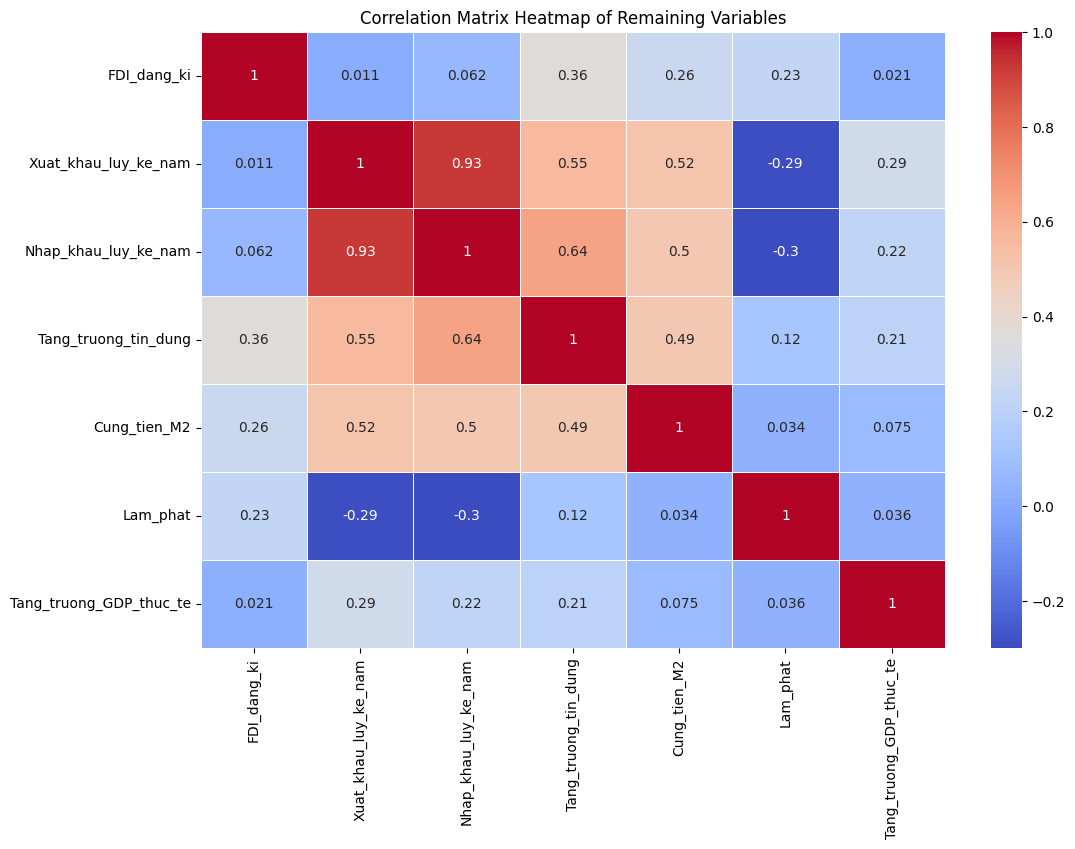

In [28]:
corr_matrix = data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Remaining Variables')
plt.show()

In [29]:
columns_to_drop = ['Nhap_khau_luy_ke_nam']

data = data.drop(columns=columns_to_drop)

In [30]:
data.head()

,FDI_dang_ki,Xuat_khau_luy_ke_nam,Tang_truong_tin_dung,Cung_tien_M2,Lam_phat,Tang_truong_GDP_thuc_te
Thoi_gian,,,,,,
2017-01-01,19,6.0,19.5,19.7,5.2,5.2
2017-02-01,21.5,16.5,19.6,18.1,5,5.2
2017-03-01,91.5,15.7,21.6,17.7,4.7,5.2
2017-04-01,53.9,17.4,20.6,17,4.3,6.4
2017-05-01,19.4,19.0,22,16.2,3.2,6.4


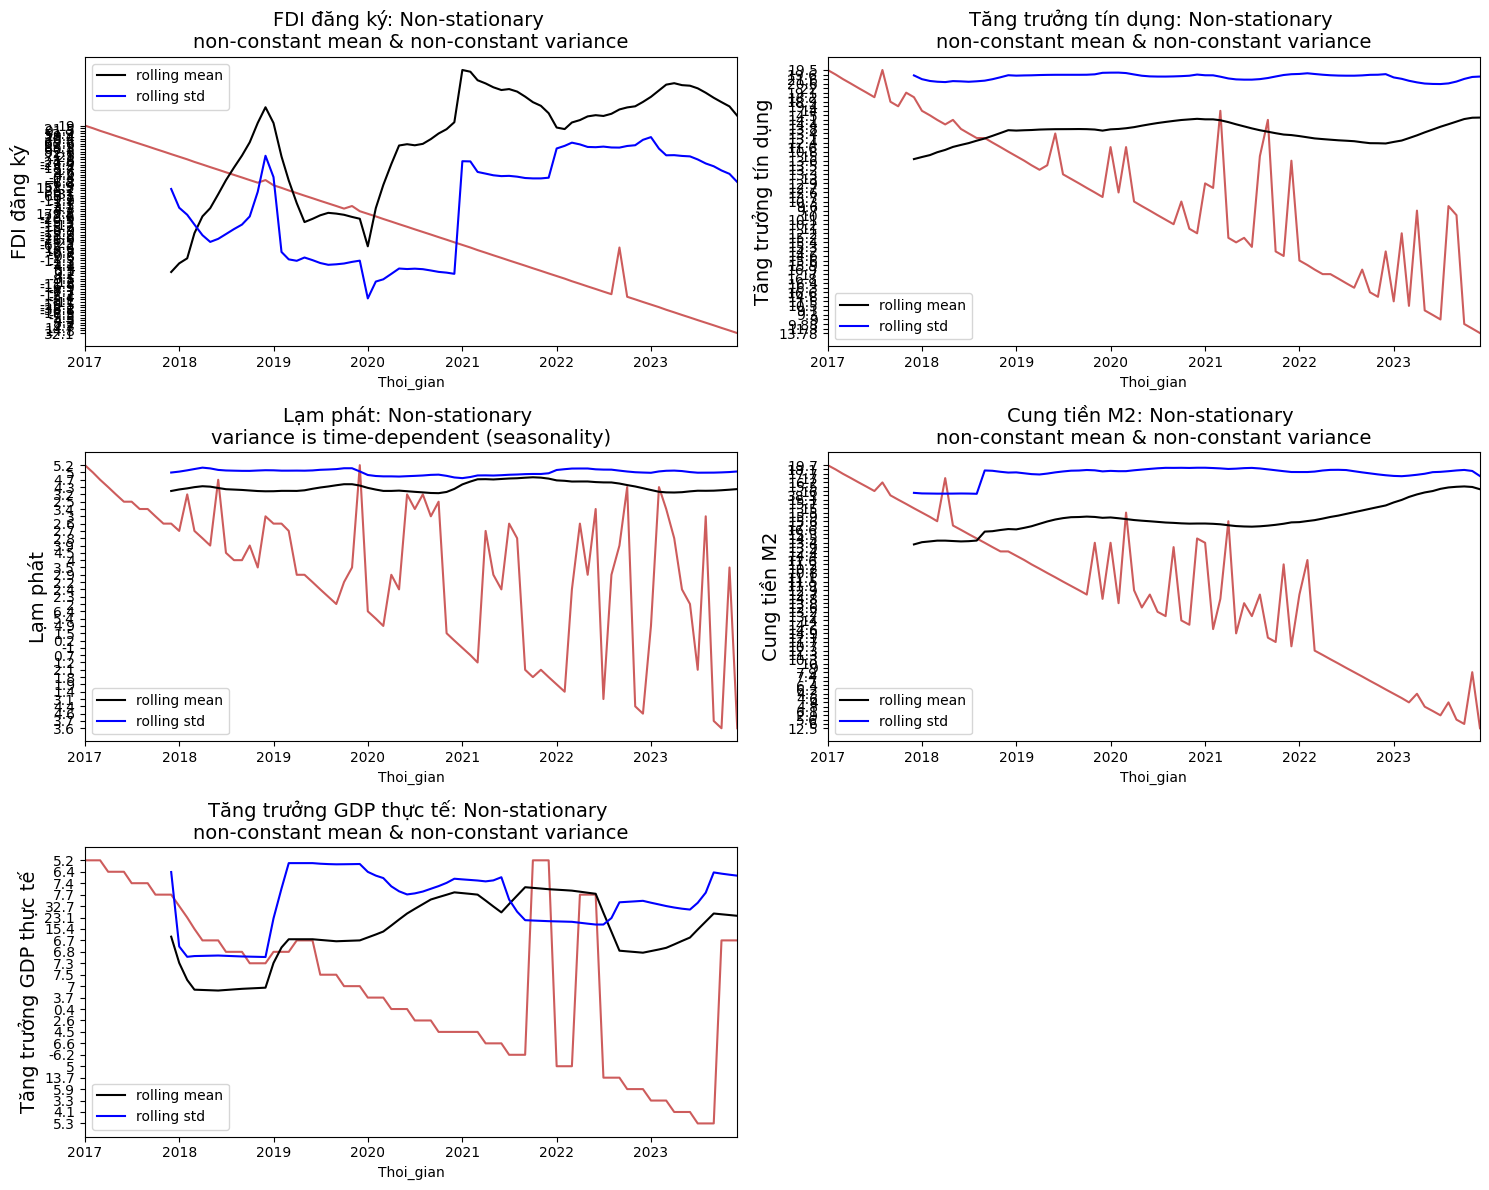

In [40]:
df = pd.DataFrame(data)

rolling_window = 12  # Đặt giá trị phù hợp với dữ liệu (12 tháng = 1 năm)
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Biểu đồ cho FDI_dang_ki
sns.lineplot(x=df.index, y=df.FDI_dang_ki, ax=ax[0, 0], color='indianred')
sns.lineplot(x=df.index, y=df.FDI_dang_ki.rolling(rolling_window).mean(), ax=ax[0, 0], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df.FDI_dang_ki.rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
ax[0, 0].set_title('FDI đăng ký: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel('FDI đăng ký', fontsize=14)

# Biểu đồ cho Lam_phat
sns.lineplot(x=df.index, y=df.Lam_phat, ax=ax[1, 0], color='indianred')
sns.lineplot(x=df.index, y=df.Lam_phat.rolling(rolling_window).mean(), ax=ax[1, 0], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df.Lam_phat.rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
ax[1, 0].set_title('Lạm phát: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel('Lạm phát', fontsize=14)

# Biểu đồ cho Tang_truong_tin_dung
sns.lineplot(x=df.index, y=df.Tang_truong_tin_dung, ax=ax[0, 1], color='indianred')
sns.lineplot(x=df.index, y=df.Tang_truong_tin_dung.rolling(rolling_window).mean(), ax=ax[0, 1], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df.Tang_truong_tin_dung.rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
ax[0, 1].set_title('Tăng trưởng tín dụng: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel('Tăng trưởng tín dụng', fontsize=14)

# Biểu đồ cho Cung_tien_M2
sns.lineplot(x=df.index, y=df.Cung_tien_M2, ax=ax[1, 1], color='indianred')
sns.lineplot(x=df.index, y=df.Cung_tien_M2.rolling(rolling_window).mean(), ax=ax[1, 1], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df.Cung_tien_M2.rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
ax[1, 1].set_title('Cung tiền M2: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel('Cung tiền M2', fontsize=14)

# Biểu đồ cho Tang_truong_GDP_thuc_te
sns.lineplot(x=df.index, y=df.Tang_truong_GDP_thuc_te, ax=ax[2, 0], color='indianred')
sns.lineplot(x=df.index, y=df.Tang_truong_GDP_thuc_te.rolling(rolling_window).mean(), ax=ax[2, 0], color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df.Tang_truong_GDP_thuc_te.rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')
ax[2, 0].set_title('Tăng trưởng GDP thực tế: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel('Tăng trưởng GDP thực tế', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([pd.to_datetime('2017-01-01'), pd.to_datetime('2023-12-01')])
    ax[i, 1].set_xlim([pd.to_datetime('2017-01-01'), pd.to_datetime('2023-12-01')])

f.delaxes(ax[2, 1])  # Xóa ô trống
plt.tight_layout()
plt.show()


In [32]:
data.shape

(84, 6)

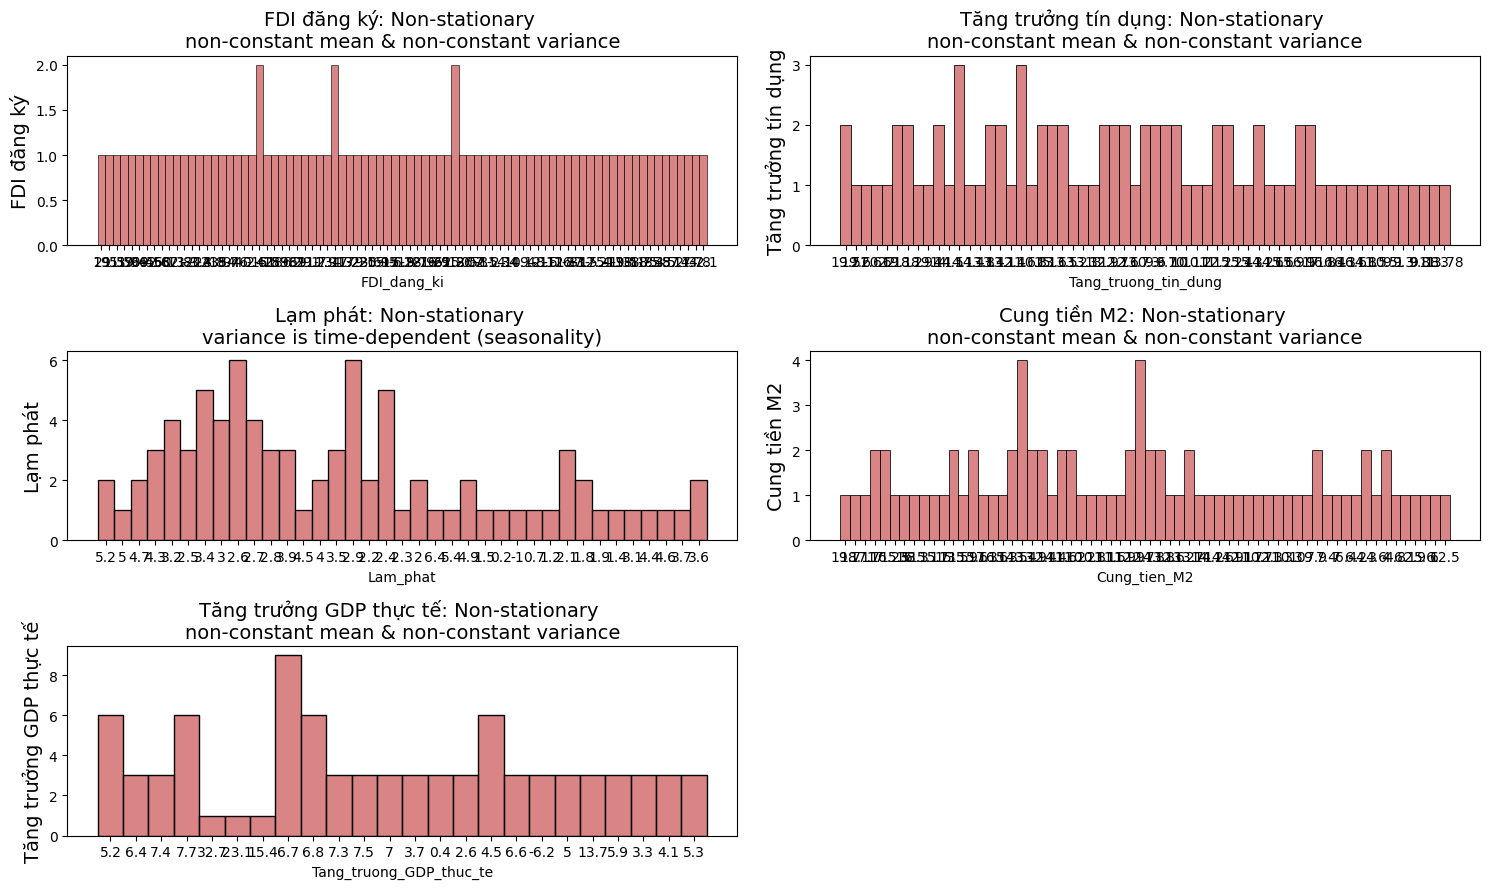

In [39]:
df = pd.DataFrame(data)
# Cập nhật mã để plot histogram cho các biến số của bạn
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

sns.histplot(df.FDI_dang_ki.fillna(np.inf), ax=ax[0, 0], color='indianred')
ax[0, 0].set_title('FDI đăng ký: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel('FDI đăng ký', fontsize=14)

sns.histplot(df.Lam_phat.fillna(np.inf), ax=ax[1, 0], color='indianred')
ax[1, 0].set_title('Lạm phát: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel('Lạm phát', fontsize=14)

sns.histplot(df.Tang_truong_tin_dung.fillna(np.inf), ax=ax[0, 1], color='indianred')
ax[0, 1].set_title('Tăng trưởng tín dụng: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel('Tăng trưởng tín dụng', fontsize=14)

sns.histplot(df.Cung_tien_M2.fillna(np.inf), ax=ax[1, 1], color='indianred')
ax[1, 1].set_title('Cung tiền M2: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel('Cung tiền M2', fontsize=14)

sns.histplot(df.Tang_truong_GDP_thuc_te.fillna(np.inf), ax=ax[2, 0], color='indianred')
ax[2, 0].set_title('Tăng trưởng GDP thực tế: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel('Tăng trưởng GDP thực tế', fontsize=14)

f.delaxes(ax[2, 1])  # Xóa ô trống
plt.tight_layout()
plt.show()


In [41]:

# Hàm để thực hiện kiểm định ADF và in kết quả
def adf_test(series, column_name):
    result = adfuller(series)
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']
    print(f'--- {column_name} ---')
    print(f'ADF Statistic: {adf_stat}')
    print(f'p-value: {p_val}')
    print('Critical Values:')
    print(f'1%: {crit_val_1}')
    print(f'5%: {crit_val_5}')
    print(f'10%: {crit_val_10}')
    print('\n')

# Thực hiện kiểm định ADF cho từng cột
adf_test(df['FDI_dang_ki'], 'FDI_dang_ki')
adf_test(df['Xuat_khau_luy_ke_nam'], 'Xuat_khau_luy_ke_nam')
adf_test(df['Tang_truong_tin_dung'], 'Tang_truong_tin_dung')
adf_test(df['Cung_tien_M2'], 'Cung_tien_M2')
adf_test(df['Lam_phat'], 'Lam_phat')
adf_test(df['Tang_truong_GDP_thuc_te'], 'Tang_truong_GDP_thuc_te')


--- FDI_dang_ki ---
ADF Statistic: -4.963079155446638
p-value: 2.6246366729593378e-05
Critical Values:
1%: -3.5117123057187376
5%: -2.8970475206326833
10%: -2.5857126912469153


--- Xuat_khau_luy_ke_nam ---
ADF Statistic: -2.8468637026071777
p-value: 0.051885141419555976
Critical Values:
1%: -3.5117123057187376
5%: -2.8970475206326833
10%: -2.5857126912469153


--- Tang_truong_tin_dung ---
ADF Statistic: -1.6838223646709698
p-value: 0.4394663635532904
Critical Values:
1%: -3.526004646825607
5%: -2.9032002348069774
10%: -2.5889948363419957


--- Cung_tien_M2 ---
ADF Statistic: -1.5242099643743416
p-value: 0.5215028399985611
Critical Values:
1%: -3.5159766913976376
5%: -2.898885703483903
10%: -2.5866935058484217


--- Lam_phat ---
ADF Statistic: -1.4492607214995776
p-value: 0.5584455892778958
Critical Values:
1%: -3.526004646825607
5%: -2.9032002348069774
10%: -2.5889948363419957


--- Tang_truong_GDP_thuc_te ---
ADF Statistic: -3.004934004499982
p-value: 0.03443618842402065
Critical Val

In [49]:
df.isnull()

,FDI_dang_ki,Xuat_khau_luy_ke_nam,Tang_truong_tin_dung,Cung_tien_M2,Lam_phat,Tang_truong_GDP_thuc_te
Thoi_gian,,,,,,
2017-01-01,False,False,False,False,False,False
2017-02-01,False,False,False,False,False,False
2017-03-01,False,False,False,False,False,False
2017-04-01,False,False,False,False,False,False
2017-05-01,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-08-01,False,False,False,False,False,False
2023-09-01,False,False,False,False,False,False
2023-10-01,False,False,False,False,False,False


In [54]:
df = df.astype(float)

In [57]:
# Log transform of absolute values
# df['Xuat_khau_luy_ke_nam'] = np.log(abs(df['Xuat_khau_luy_ke_nam']))
df['Cung_tien_M2'] = np.log(abs(df['Cung_tien_M2']))
df['Lam_phat'] = np.log(abs(df['Lam_phat']))

# Hàm để thực hiện kiểm định ADF và in kết quả
def adf_test(series, column_name):
    result = adfuller(series.dropna())  # Loại bỏ NaN để tránh lỗi
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']
    print(f'--- {column_name} ---')
    print(f'ADF Statistic: {adf_stat}')
    print(f'p-value: {p_val}')
    print('Critical Values:')
    print(f'1%: {crit_val_1}')
    print(f'5%: {crit_val_5}')
    print(f'10%: {crit_val_10}')
    print('\n')

# Thực hiện kiểm định ADF cho cột Depth_to_Groundwater_log
# adf_test(df['Xuat_khau_luy_ke_nam'], 'Xuat_khau_luy_ke_nam')
adf_test(df['Cung_tien_M2'], 'Cung_tien_M2')
adf_test(df['Lam_phat'], 'Lam_phat')


--- Cung_tien_M2 ---
ADF Statistic: -2.7155084844233297
p-value: 0.07139285621597005
Critical Values:
1%: -3.5194805351545413
5%: -2.9003945086747343
10%: -2.5874984279778395


--- Lam_phat ---
ADF Statistic: -3.800585412904092
p-value: 0.002901331129547192
Critical Values:
1%: -3.5117123057187376
5%: -2.8970475206326833
10%: -2.5857126912469153




In [ ]:
# First Order Differencing
# ts_diff = np.diff(df.C)
# df['Depth_to_Groundwater_diff_1'] = np.append([0], ts_diff)

# # Second Order Differencing
# ts_diff = np.diff(df.Depth_to_Groundwater_diff_1)
# df['Depth_to_Groundwater_diff_2'] = np.append([0], ts_diff)

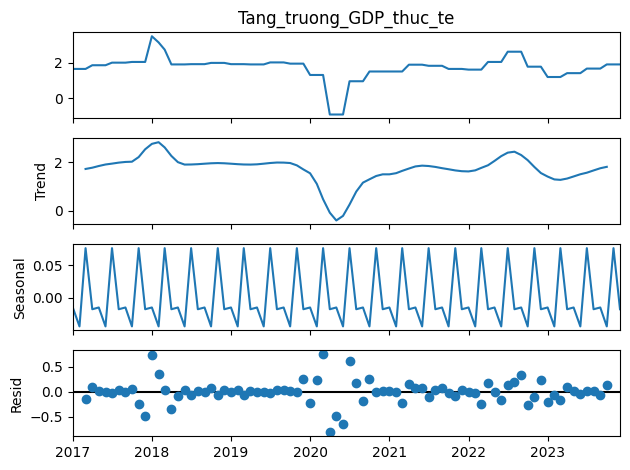

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Log transform of absolute values
df['Tang_truong_GDP_thuc_te'] = np.log(abs(df['Tang_truong_GDP_thuc_te']))

# Decompose the time series
result = seasonal_decompose(df['Tang_truong_GDP_thuc_te'], model='additive', period=4)

# Plot the decomposition
result.plot()
plt.show()

In [59]:
shifted_cols = [ 'Tang_truong_GDP_thuc_te', 
                'Lam_phat',
                'Tang_truong_tin_dung']
corrmat = df[shifted_cols].corr()

# Vẽ biểu đồ heatmap
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Shifted Features', fontsize=16)


plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'spines'

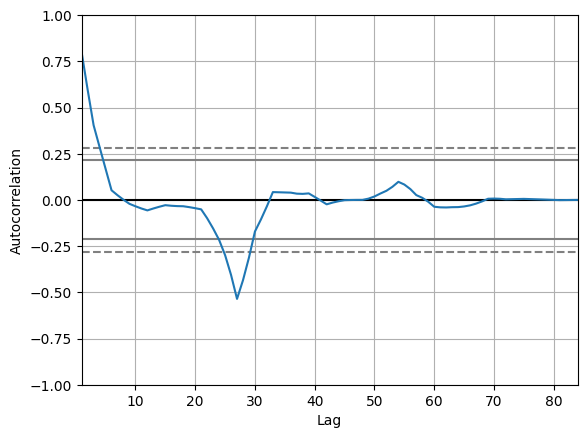

In [60]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Tang_truong_GDP_thuc_te)
plt.show()

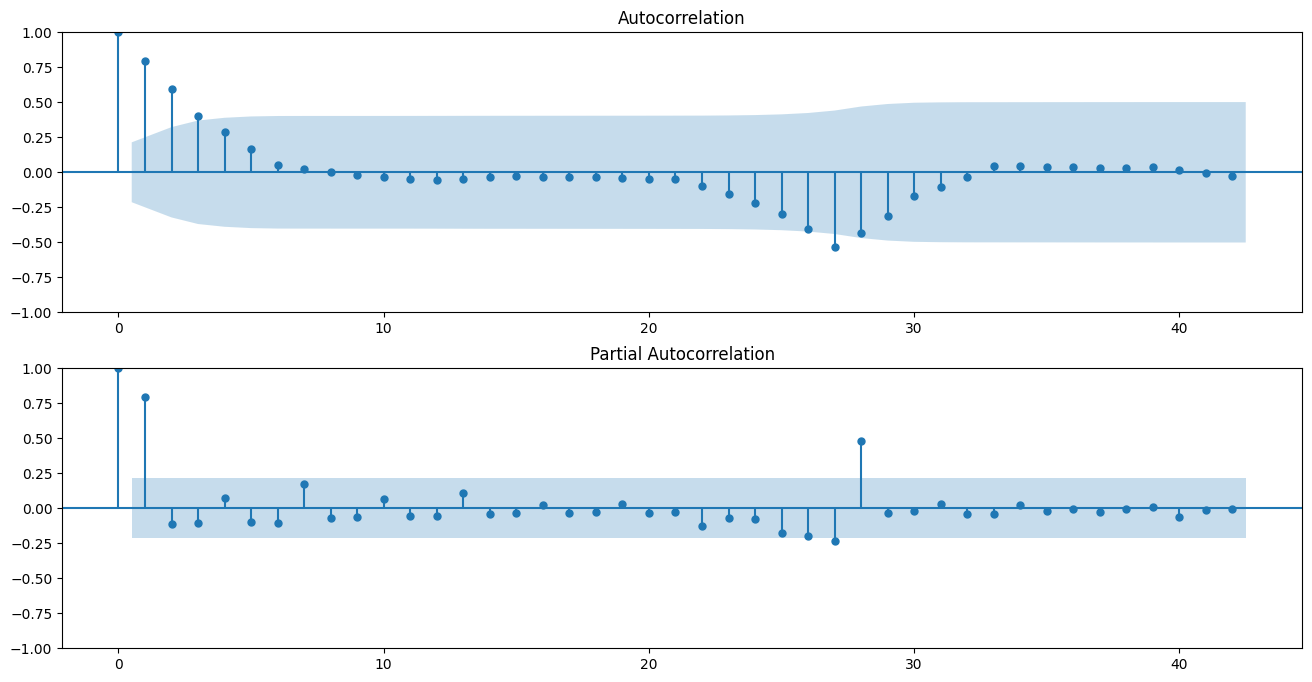

In [69]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df.Tang_truong_GDP_thuc_te,lags=42, ax=ax[0])
plot_pacf(df.Tang_truong_GDP_thuc_te,lags=42, ax=ax[1])
plt.show()

In [65]:
df.head

<bound method NDFrame.head of             FDI_dang_ki  Xuat_khau_luy_ke_nam  Tang_truong_tin_dung  \
Thoi_gian                                                             
2017-01-01         19.0             -0.481888                 19.50   
2017-02-01         21.5              1.251289                 19.60   
2017-03-01         91.5              1.471220                 21.60   
2017-04-01         53.9              1.108011                 20.60   
2017-05-01         19.4              0.942130                 22.00   
...                 ...                   ...                   ...   
2023-08-01          8.2              0.130089                  9.60   
2023-09-01          7.7              0.197149                 10.00   
2023-10-01         14.7             -0.076569                  9.88   
2023-11-01         14.8             -0.531284                 11.30   
2023-12-01         32.1             -2.678307                 13.78   

            Cung_tien_M2  Lam_phat  Tang_truon

In [66]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

y = df.Tang_truong_GDP_thuc_te

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [ ]:
# Hàm kiểm tra và chuyển đổi dữ liệu thành dạng dừng (stationary)
def make_stationary(df):
    df_stationary = df.copy()
    for column in df.columns:
        p_value = adfuller(df[column].dropna())[1]  # Ensure dropna() for ADF test
        if p_value > 0.05:
            df_stationary[column] = df[column].diff().dropna()
        else:
            df_stationary[column] = df[column]
    return df_stationary.dropna()

# Đảm bảo kiểu dữ liệu nhất quán
data = data.astype(float)

# Thay thế các giá trị bằng 0 hoặc âm bằng NaN để tránh lỗi logarit
data = data.replace(0, np.nan)
data = data.applymap(lambda x: x if x > 0 else np.nan)
data = data.fillna(method='bfill').fillna(method='ffill')

# Biến đổi logarit dữ liệu
data_log = np.log(data)

# Kiểm tra và chuyển đổi dữ liệu thành dạng dừng
data_stationary = make_stationary(data_log)


C:\Users\THANH TUYEN\AppData\Local\Temp\ipykernel_12068\512518088.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x if x > 0 else np.nan)
C:\Users\THANH TUYEN\AppData\Local\Temp\ipykernel_12068\512518088.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill').fillna(method='ffill')


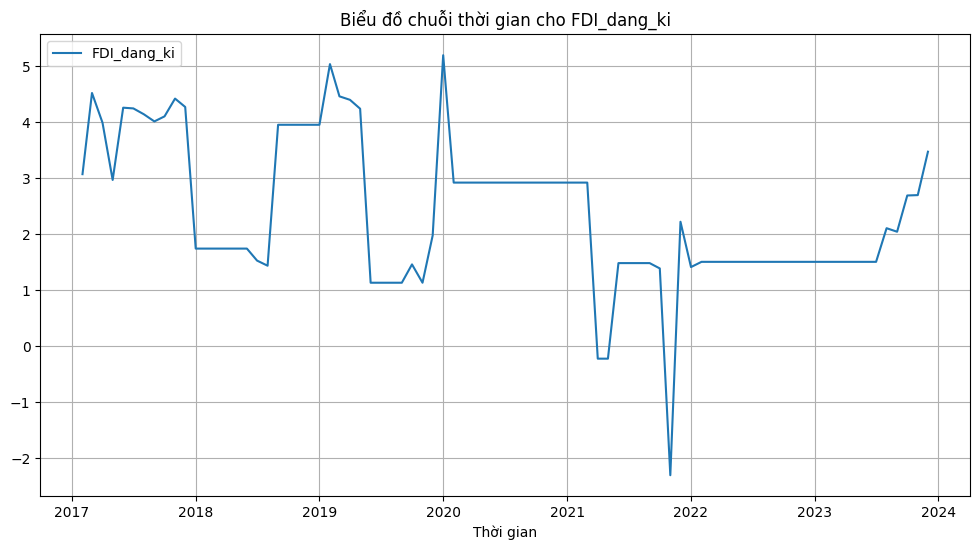

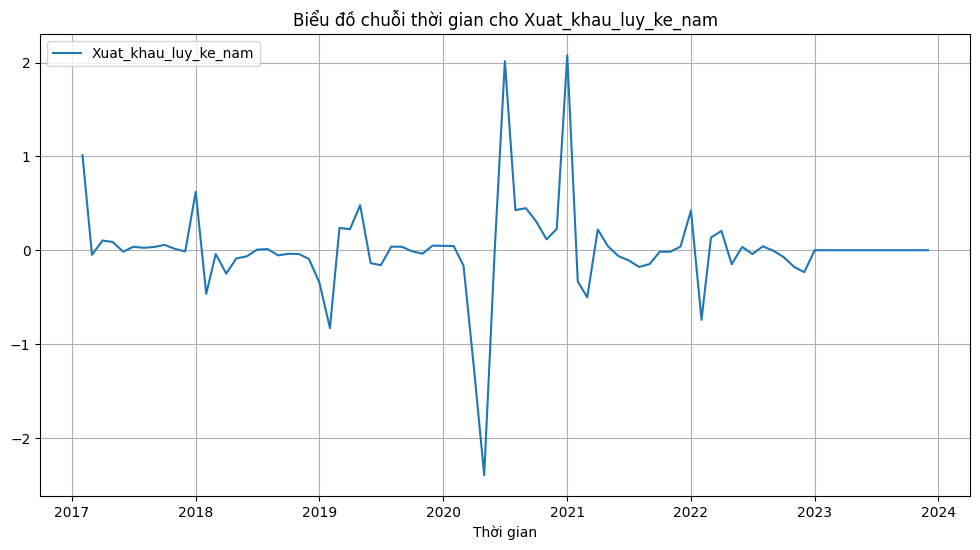

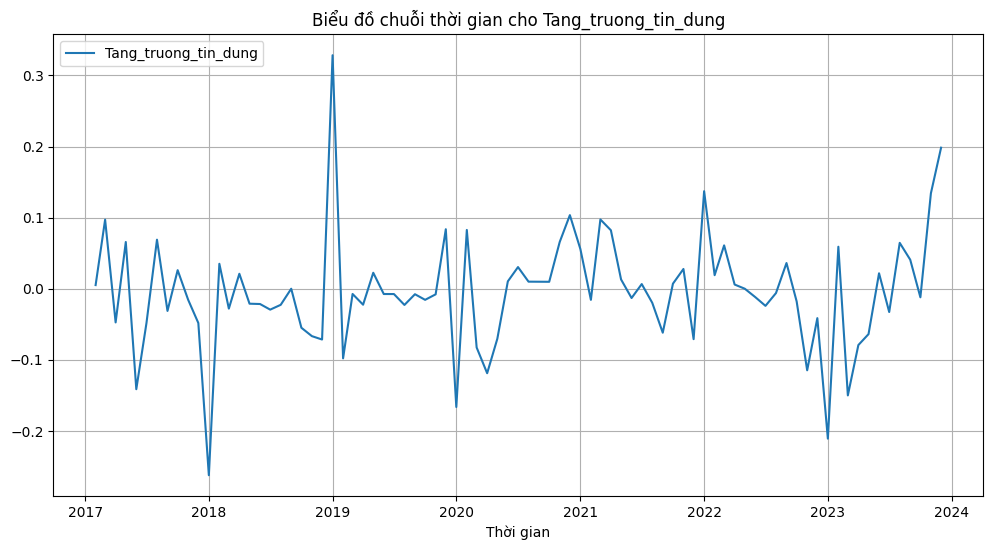

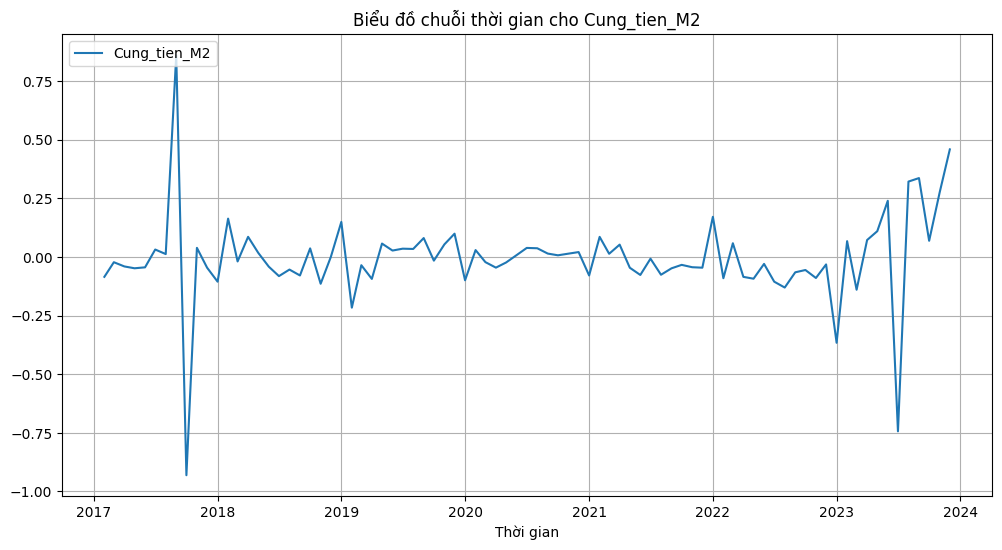

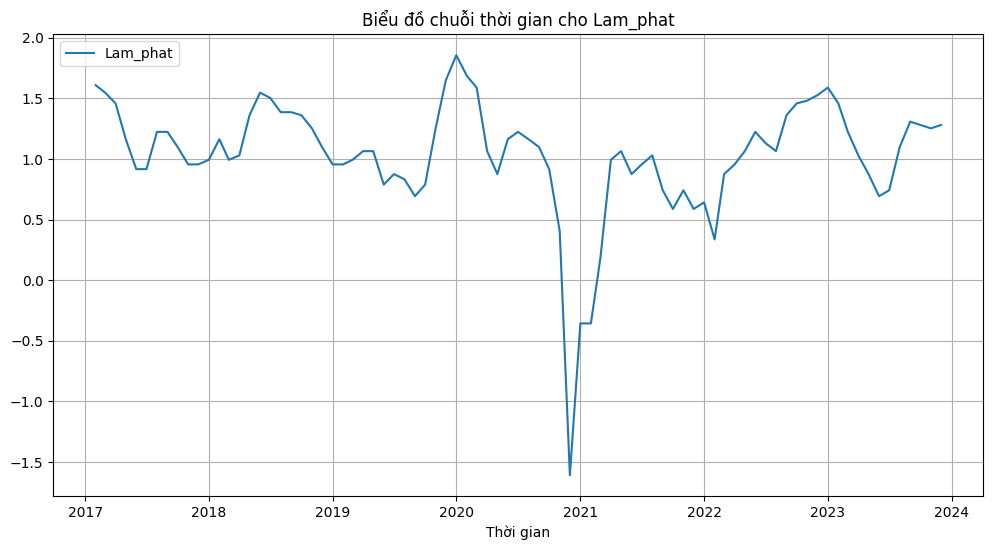

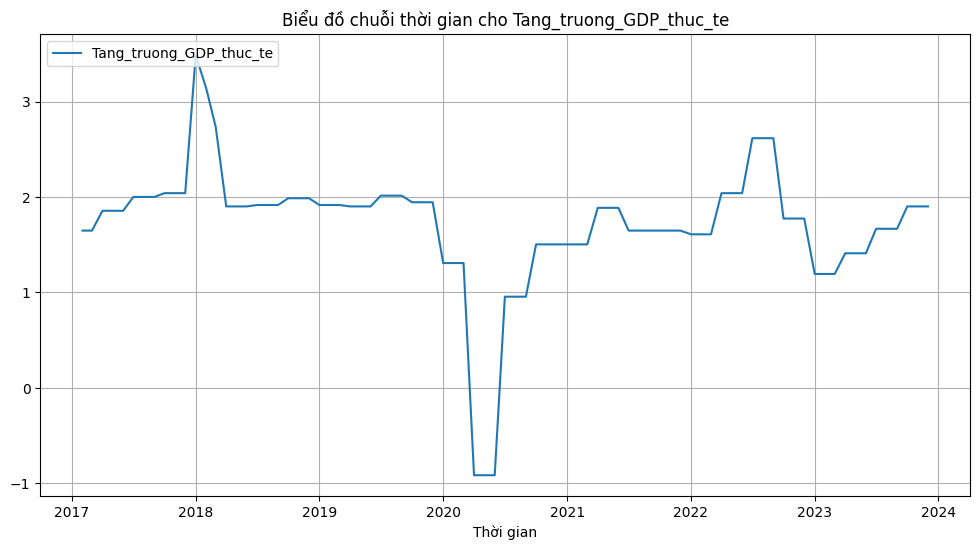

In [ ]:
# Lấy tất cả các cột trừ 'Thoi_gian' (vì nó là index)
columns_to_plot = data_stationary.columns

# Vẽ mỗi chuỗi thời gian trong một hình riêng biệt
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    plt.plot(data_stationary.index, data_stationary[column], label=column)
    plt.xlabel('Thời gian')
    # plt.ylabel('Giá trị')
    plt.title(f'Biểu đồ chuỗi thời gian cho {column}')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [ ]:
# Split data into training and testing sets
train_data = data_stationary['2017-01-01':'2022-12-01']
test_data = data_stationary['2023-01-01':'2023-12-01']

# Check if training and testing sets are not empty
if train_data.empty or test_data.empty:
    raise ValueError("The training or testing data is empty after splitting. Please check the date ranges.")

# Standardize the data (important for VAR models)
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Convert scaled data back to DataFrame for VAR
train_data_scaled = pd.DataFrame(train_data_scaled, index=train_data.index, columns=train_data.columns)
test_data_scaled = pd.DataFrame(test_data_scaled, index=test_data.index, columns=test_data.columns)

In [ ]:
# Training the VAR model with hyperparameter tuning
best_aic = float('inf')
best_order = None
best_model = None

for i in range(1, 8):  # Test lags from 1 to 7
    model = VAR(train_data_scaled)
    result = model.fit(i)

    if result.aic < best_aic:
        best_aic = result.aic
        best_order = i
        best_model = result

print(f'Best AIC: {best_aic}')
print(f'Best order: {best_order}')

# Summary of the best model
print(best_model.summary())


Best AIC: -2.2951741797486225
Best order: 1
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, May, 2024
Time:                     23:50:30
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                  -0.946077
Nobs:                     70.0000    HQIC:                  -1.75930
Log likelihood:          -473.623    FPE:                   0.101150
AIC:                     -2.29517    Det(Omega_mle):       0.0570966
--------------------------------------------------------------------
Results for equation FDI_dang_ki
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.011437         0.092274           -0.124           0.901
L1.FDI_dang_ki                     0.646811         

c:\Users\THANH TUYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\THANH TUYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\THANH TUYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\THANH TUYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\THANH TUYEN\AppData\Loc

Mean Squared Error: 11.371514470874219


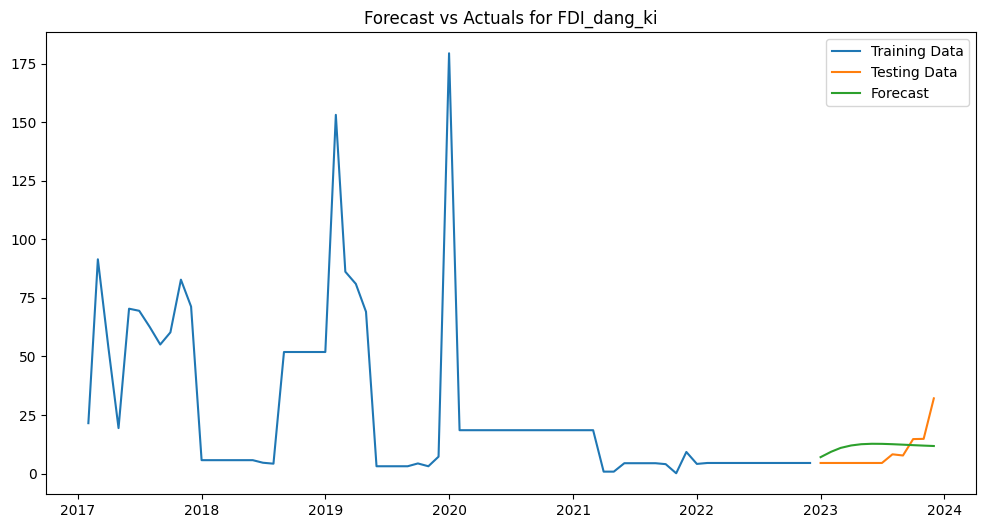

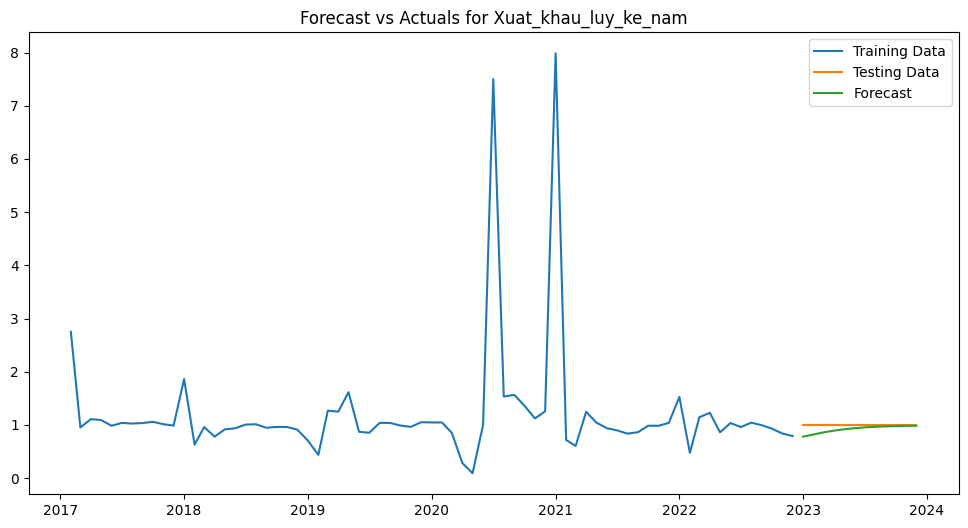

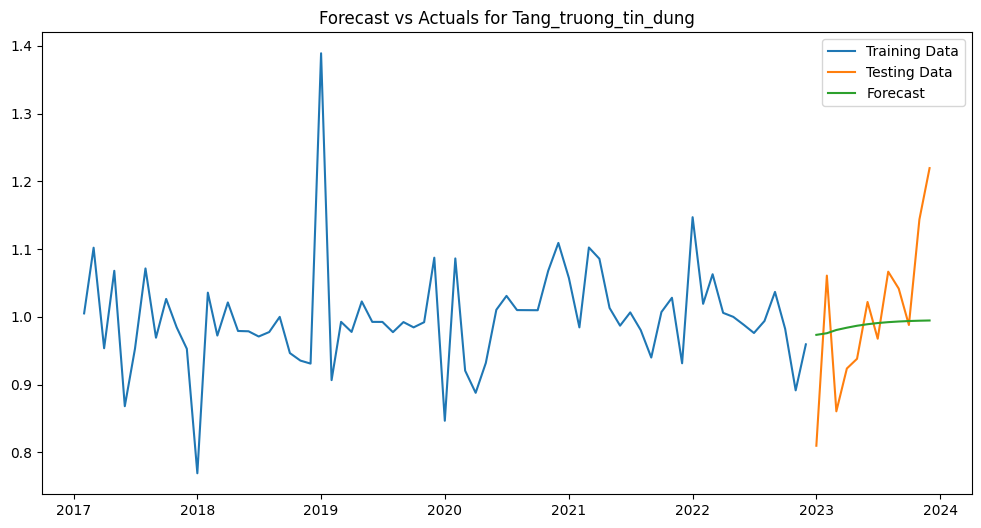

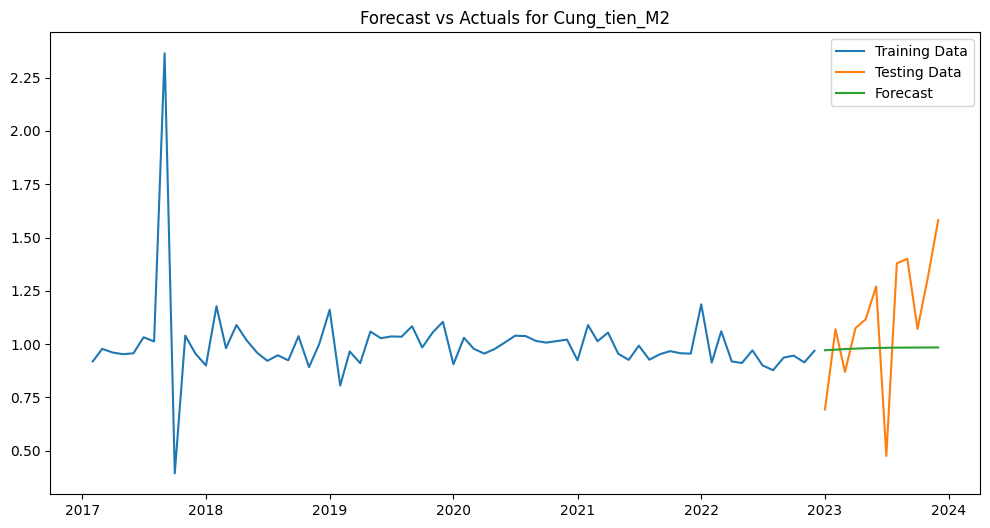

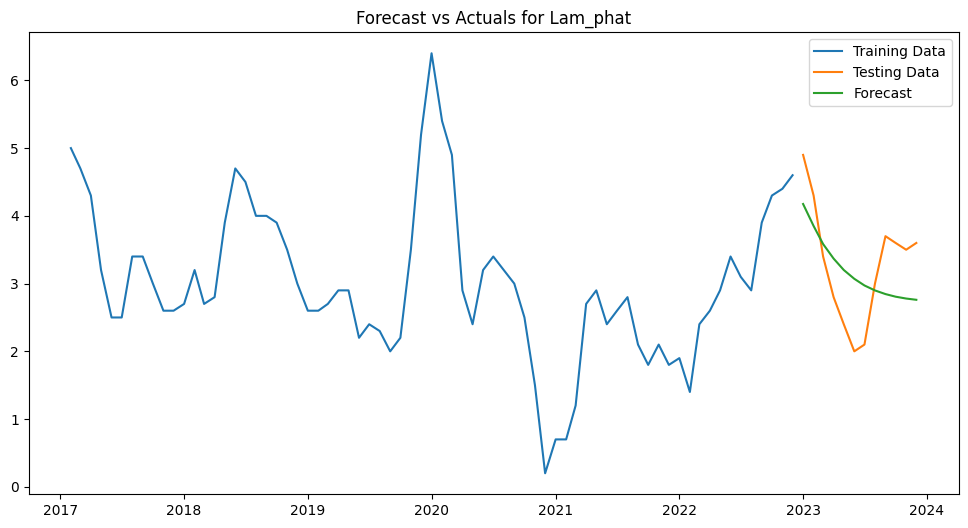

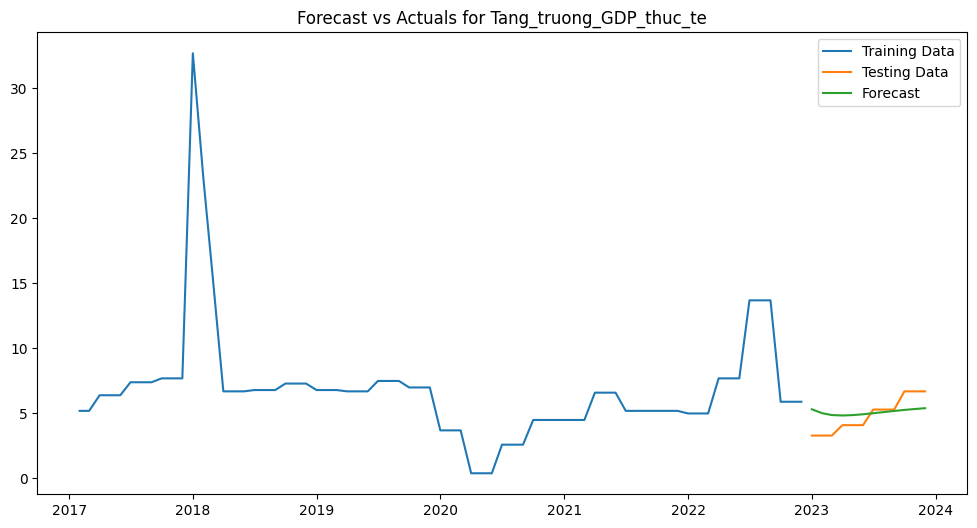

In [ ]:
# Forecasting
forecast_steps = len(test_data_scaled)
forecast = best_model.forecast(train_data_scaled.values[-best_order:], steps=forecast_steps)
forecast = scaler.inverse_transform(forecast)  # Inverse transform to original scale

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Reverse log transformation
forecast_df = np.exp(forecast_df)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(np.exp(test_data), forecast_df)
print(f'Mean Squared Error: {mse}')

# Optionally: Plot the results
for column in data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, np.exp(train_data[column]), label='Training Data')
    plt.plot(test_data.index, np.exp(test_data[column]), label='Testing Data')
    plt.plot(forecast_df.index, forecast_df[column], label='Forecast')
    plt.title(f'Forecast vs Actuals for {column}')
    plt.legend()
    plt.show()

In [ ]:
# Đặt số bước dự báo cho 12 tháng tiếp theo
forecast_steps_next_12_months = 12

# Dự báo cho 12 tháng tiếp theo
forecast_next_12_months = best_model.forecast(train_data_scaled.values[-best_order:], steps=forecast_steps_next_12_months)
forecast_next_12_months = scaler.inverse_transform(forecast_next_12_months)  # Chuyển về tỷ lệ ban đầu

# Chuyển dự báo sang DataFrame
forecast_next_12_months_df = pd.DataFrame(forecast_next_12_months, columns=test_data.columns)

# Đảo ngược biến đổi log
forecast_next_12_months_df = np.exp(forecast_next_12_months_df)

# Hiển thị dự báo cho 12 tháng tiếp theo
print("Forecast for the next 12 months:")
forecast_next_12_months_df


Forecast for the next 12 months:


,FDI_dang_ki,Xuat_khau_luy_ke_nam,Tang_truong_tin_dung,Cung_tien_M2,Lam_phat,Tang_truong_GDP_thuc_te
0,6.990935,0.779166,0.973463,0.971310,4.175094,5.320419
1,9.288886,0.820108,0.975863,0.973802,3.850463,5.016511
2,10.931261,0.858504,0.980641,0.977083,3.583831,4.878436
3,11.979015,0.891195,0.984023,0.978954,3.369246,4.844726
4,12.517008,0.917405,0.986897,0.980717,3.200715,4.873154
5,12.701835,0.937824,0.989146,0.981863,3.070866,4.937117
6,12.668806,0.953306,0.990882,0.982762,2.972482,5.018872
7,12.519133,0.964714,0.992193,0.983362,2.899122,5.106614
8,12.320172,0.972884,0.993157,0.983782,2.845344,5.192708
9,12.112385,0.978546,0.993849,0.984050,2.806671,5.272488
